In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
%matplotlib inline

cities_names = np.array(["Schwerin", "Wismar", "Rostok", "Stralsund", "Greifswald", "Neubrandenburg"])
cities_coordinates = np.array([[2,1],[4,6],[9,8],[13,10],[18,8],[17,1]])

leng = 12
neuron_numbers = np.arange(leng)
circle_x = np.random.randint(90, 150, leng)
circle_x = circle_x/10.0
circle_y = np.array([])
for i in range(leng):
    sign = 1
    if (i%2 == 0):
        sign = -1
    y = sign*math.sqrt(9 - (circle_x[i]-12)**2) + 4
    circle_y = np.append(circle_y, y)

initial_weights = np.column_stack((circle_x, circle_y))
weights = initial_weights

In [2]:
def plot(cities_coordinates, weights):
    fig, ax = plt.subplots()
    ax.scatter(cities_coordinates[:,0], cities_coordinates[:,1], c = 'r')
    ax.scatter(weights[:,0], weights[:,1], c = 'b')

    #ax.annotate(cities_names[0], xy=cities_coordinates[], xytext=(3, 1.5))

    for i in range(len(cities_names)):
        ax.annotate(cities_names[i], (cities_coordinates[i,0],cities_coordinates[i,1]))
    for i in range(len(neuron_numbers)):
        ax.annotate(neuron_numbers[i], (weights[i,0],weights[i,1]))

    plt.show()

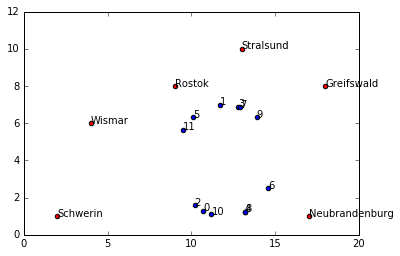

In [3]:
plot(cities_coordinates, weights)

In [4]:
def eta(step):
    return 0.05*(500.0 - step)/500.0
#eta = 0.01

In [5]:
change = 100
step = 0
summ = 100
indicies = np.array([])

while(abs(summ) > 0.0001):
    summ = 0
    indicies = np.array([])
    for city in cities_coordinates:
        #Determine the winning neuron 
        dists = np.array([])
        for weight in weights:
            dist = math.hypot(city[0]-weight[0], city[1]-weight[1])
            dists = np.append(dists, dist)
        winner_index = np.argmin(dists)
        indicies = np.append(indicies, winner_index)
        #Adapt the weights of the winner neuron:
        weights[winner_index] = weights[winner_index] + eta(step)*(city - weights[winner_index])
        change = LA.norm(eta(step)*(city - weights[winner_index]))
        summ += change
    step += 1
print step
print indicies

225
[  2.  11.   5.   3.   9.   6.]


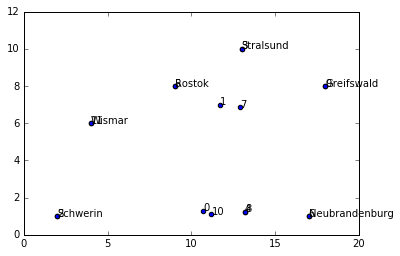

In [6]:
plot(cities_coordinates, weights)

/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/elhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


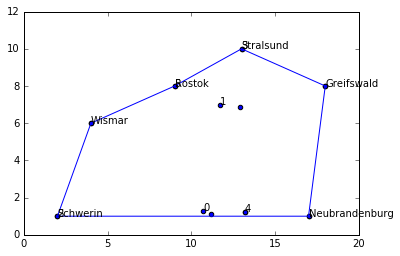

58.71443512


In [7]:
weights_assigned = weights[indicies[0]]
for i in range(1,6):
    weights_assigned = np.row_stack((weights_assigned, weights[indicies[i]]))
weights_assigned = np.row_stack((weights_assigned, weights[indicies[0]]))

fig, ax = plt.subplots()
ax.scatter(cities_coordinates[:,0], cities_coordinates[:,1], c = 'r')
ax.scatter(weights[:,0], weights[:,1], c = 'b')

#ax.annotate(cities_names[0], xy=cities_coordinates[], xytext=(3, 1.5))

length = 0
for i in range(len(cities_names)):
    ax.annotate(cities_names[i], (cities_coordinates[i,0],cities_coordinates[i,1]))
    ax.annotate(neuron_numbers[i], (weights[i,0],weights[i,1]))
    length += math.hypot(weights[i,0]-weights[i+1,0], weights[i,1]-weights[i+1,1])
    
plt.plot(weights_assigned[:,0], weights_assigned[:,1])
plt.show()
print length